In [63]:
import tensorflow as tf
import keras
from keras.layers import Dense , Conv2D , MaxPooling2D , GlobalAveragePooling2D , Dropout , Flatten , BatchNormalization
from keras.optimizers import Adam 
import matplotlib.pyplot as plt
from keras.applications import ResNet50 , MobileNetV2 , InceptionV3 , EfficientNetB7 , Xception , DenseNet201
from keras.models import Sequential

In [64]:
img_size = 128
batch_size = 16
epochs = 25
lr = 0.0001

In [65]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory="C:\\Movies\\asl_alphabet_train - Copy",
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch_size
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    directory="C:\\Movies\\asl_alphabet_train - Copy",
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch_size
)

# test_dataset = tf.keras.utils.image_dataset_from_directory(
#     directory="C:\\Movies\\asl_alphabet_test",
#     image_size=(img_size, img_size),
#     batch_size=batch_size
# )


Found 45823 files belonging to 29 classes.
Using 41241 files for training.
Found 45823 files belonging to 29 classes.
Using 4582 files for validation.


In [66]:
class_names = train_dataset.class_names
num_classes = len(class_names)
print(class_names)
print(num_classes)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
29


In [67]:
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [68]:
model = Sequential()

resnet_base = DenseNet201(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
resnet_base.trainable = False  

model.add(resnet_base)
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    optimizer=Adam(learning_rate=lr),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

74836368/74836368 [==============================] - 21s 0us/step
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 4, 4, 1920)        18321984  
                                                                 
 flatten_5 (Flatten)         (None, 30720)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               7864576   
                                                                 
 dense_11 (Dense)            (None, 29)                7453      
                                                                 
Total params: 26,194,013
Trainable params: 7,872,029
Non-trainable params: 18,321,984
_________________________________________________________________


In [69]:
history = model.fit(train_dataset, epochs=epochs, validation_data=validation_dataset)

Epoch 1/25
2578/2578 [==============================] - 242s 85ms/step - loss: 0.1270 - accuracy: 0.9668 - val_loss: 0.0675 - val_accuracy: 0.9786
Epoch 2/25
2578/2578 [==============================] - 210s 82ms/step - loss: 0.0416 - accuracy: 0.9884 - val_loss: 0.0467 - val_accuracy: 0.9871
Epoch 3/25
2578/2578 [==============================] - 205s 79ms/step - loss: 0.0234 - accuracy: 0.9933 - val_loss: 0.0288 - val_accuracy: 0.9921
Epoch 4/25
2578/2578 [==============================] - 208s 80ms/step - loss: 0.0282 - accuracy: 0.9928 - val_loss: 0.0350 - val_accuracy: 0.9928
Epoch 5/25
2578/2578 [==============================] - 209s 81ms/step - loss: 0.0201 - accuracy: 0.9946 - val_loss: 0.0274 - val_accuracy: 0.9937
Epoch 6/25
2578/2578 [==============================] - 206s 80ms/step - loss: 0.0147 - accuracy: 0.9958 - val_loss: 0.0355 - val_accuracy: 0.9937
Epoch 7/25
2578/2578 [==============================] - 206s 80ms/step - loss: 0.0097 - accuracy: 0.9971 - val_loss: 0

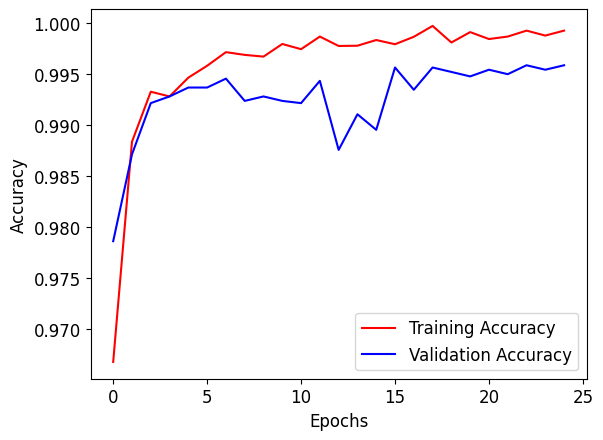

In [70]:
plt.rcParams.update({'font.size': 12})
plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

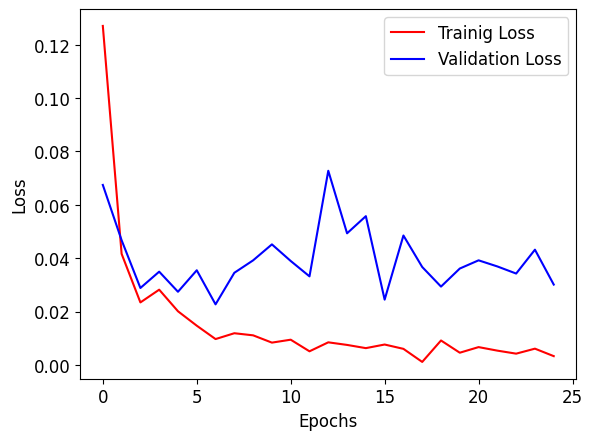

In [71]:
plt.rcParams.update({'font.size': 12})
plt.plot(history.history['loss'], color='red', label='Trainig Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [72]:
model.save("C:\\Code_EveryThing\\Git_Project\\SignLanguageMnist\\densenet201model.h5")